In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

/home/boris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cols=['dateTime','Ouverture','Chamb_Temp','Lyon_Temp']
parse_dates = ['dateTime']
raw_data = pd.read_csv('temperatures2.csv', skiprows=[0],names=cols,decimal=",",sep=";", parse_dates=parse_dates)
raw_data.head()

,dateTime,Ouverture,Chamb_Temp,Lyon_Temp
0,2018-05-06 00:00:00,NaN,19.200,19.750
1,2018-05-06 01:00:00,NaN,19.200,19.450
2,2018-05-06 02:00:00,NaN,19.225,19.250
3,2018-05-06 03:00:00,NaN,19.300,19.075
4,2018-05-06 04:00:00,NaN,19.300,18.900


In [3]:

raw_data.loc[0,'Ouverture']=0
for line in raw_data.index:
    if np.isnan(raw_data.Ouverture[line]):
        if np.isnan(raw_data.Chamb_Temp[line]):
            raw_data.Ouverture[line]=0
        else:
            raw_data.Ouverture[line]=raw_data.Ouverture[line-1]
    if np.isnan(raw_data.Chamb_Temp[line]):
        raw_data.Chamb_Temp[line] = raw_data.Chamb_Temp[line-1]
        raw_data.Lyon_Temp[line] = raw_data.Lyon_Temp[line-1]
    #raw_data.Lyon_Temp[line] = raw_data.Lyon_Temp[line] - raw_data.Chamb_Temp[line]
    oneHour = raw_data.dateTime[line] + pd.DateOffset(hours=1)
    if raw_data[raw_data['dateTime']==oneHour].shape[0]>0:
        raw_data.loc[line,'Temp_1H'] = raw_data[raw_data['dateTime']==oneHour].Chamb_Temp.iloc[0] - raw_data.Chamb_Temp[line]
    else:
        raw_data.loc[line,'Temp_1H'] = 0
raw_data.Lyon_Temp = raw_data.Lyon_Temp - raw_data.Chamb_Temp
raw_data.dateTime = raw_data.dateTime.dt.hour*3600+raw_data.dateTime.dt.minute*60+raw_data.dateTime.dt.second
raw_data.head()

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,dateTime,Ouverture,Chamb_Temp,Lyon_Temp,Temp_1H
0,0,0.0,19.200,0.550,0.000
1,3600,0.0,19.200,0.250,0.025
2,7200,0.0,19.225,0.025,0.075
3,10800,0.0,19.300,-0.225,0.000
4,14400,0.0,19.300,-0.400,0.000


In [4]:
#raw_data.dateTime.dt.time.hour*3600+raw_data.dateTime.dt.time[1].minute*60+raw_data.dateTime.dt.time[1].second
#
#raw_data

In [5]:
X = raw_data.values[:,range(0,4)]
y = raw_data.values[:,4]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.8)
regr = linear_model.LinearRegression()
regr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

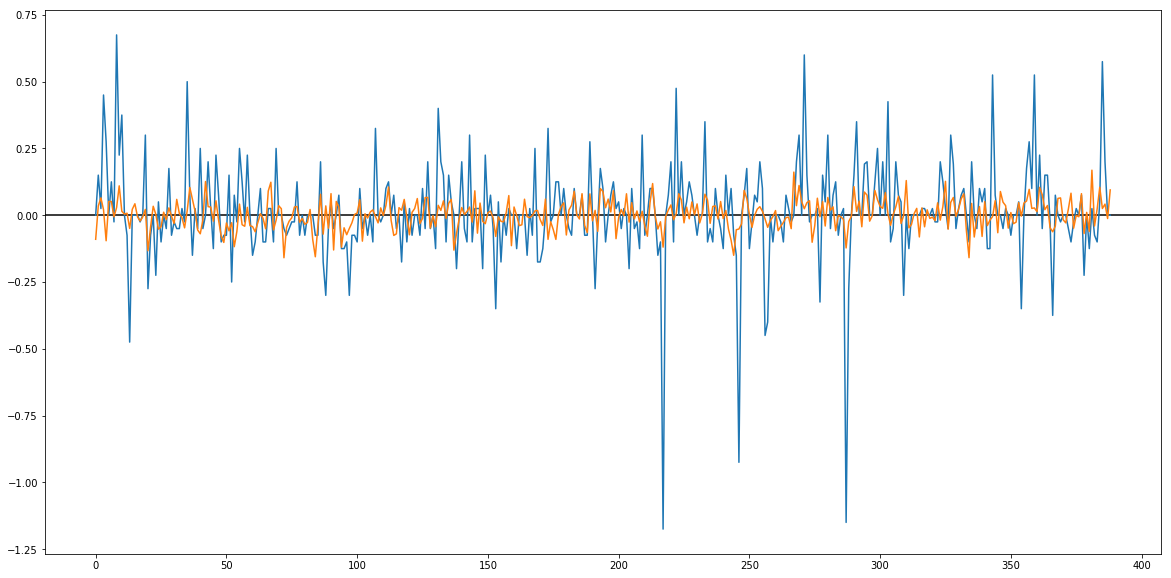

In [6]:
plt.rcParams["figure.figsize"] = [20.0,10.0]
plt.axhline(y=0, color='k')
plt.plot(ytest)
plt.plot(regr.predict(Xtest))

In [7]:
1-regr.score(Xtest,ytest)

0.8735797712701006

In [8]:
raw_data.nlargest(10, 'Temp_1H')

,dateTime,Ouverture,Chamb_Temp,Lyon_Temp,Temp_1H
473,36000,1.0,21.100,-1.600,1.375
1318,43200,1.0,26.575,0.550,0.675
1517,39600,1.0,23.875,-0.200,0.625
212,39600,1.0,17.625,-4.575,0.600
238,39600,1.0,17.200,-1.750,0.600
1734,0,1.0,25.875,-2.725,0.600
1504,82800,0.0,25.725,-1.650,0.600
1903,44100,1.0,28.100,1.100,0.600
1317,39600,1.0,26.000,0.250,0.575
1519,43200,0.0,24.500,-0.200,0.550


In [9]:
for i in range(0,100):
    print(str(regr.predict(Xtest)[i]) + " | " + str(ytest[i]))

-0.09015859363138296 | 0.0
0.03490659564223386 | 0.15000000000000213
0.06500678349410385 | 0.02499999999999858
0.020656261065967574 | 0.4499999999999993
-0.0956080121294915 | 0.27500000000000213
0.05138757757887452 | 0.0
0.05122015292402196 | 0.125
-0.006281806583118554 | -0.02499999999999858
0.028776306091929466 | 0.6750000000000007
0.10999053108708466 | 0.22500000000000142
0.01475270983014712 | 0.375
0.004170466810636736 | 0.0
0.007559176510137655 | -0.07499999999999929
-0.049356664115563664 | -0.4750000000000014
0.022195922017026887 | 0.0
0.04288139290311099 | 0.0
-0.006019504707656276 | 0.0
-0.02163432354141631 | -0.02500000000000213
-0.006348331320536471 | 0.0
0.021839380822773397 | 0.29999999999999716
-0.13309004029450605 | -0.2749999999999986
-0.04378108147591103 | -0.07499999999999929
0.033518654272281456 | 0.0
0.0033737712929178543 | -0.22499999999999787
-0.05234725654375044 | 0.05000000000000071
-0.04306529984376001 | -0.09999999999999787
0.011311543695345566 | 0.0
-0.0165726